#### Amazinum. Task 9. Titanic. Moisei

Не можу виконати Submit Predictions щоб подивитись Leaderboards. Тому, що не можу пройти який день верифікацію номеру телефону. Фото прикріплене до файлів таску.

#### Load data

In [1]:
import os
import pandas as pd
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def get_train_set():
    print ('Titanic train set')
    fp = os.path.join('train.csv')
    df_train = pd.read_csv(fp, encoding='ISO-8859-1',low_memory=False) 
    return df_train


df_train= get_train_set ()
df_train.head()

Titanic train set


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def get_test_set():    
    print ('Titanic test set')
    fp = os.path.join('test.csv')
    df_test = pd.read_csv(fp)  # , encoding = 'ISO-8859-1')

    return df_test

df_test= get_test_set()
# df_test.describe()
list(df_test)

Titanic test set


['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
def get_gs():    
    print ('Titanic gender submission')
    fp = os.path.join('gender_submission.csv')
    df_gs = pd.read_csv(fp, encoding = 'ISO-8859-1')
    return df_gs


df_gs= get_gs ()
df_gs.head()

Titanic gender submission


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### Fill mission value

In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Review missed values

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Drop and handle missing values

In [8]:
df_train = df_train.drop(columns='Cabin', axis=1)

In [9]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

Finding the mode value for Embarked column

In [10]:
print(df_train['Embarked'].mode)

<bound method Series.mode of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>


In [11]:
print(df_train['Embarked'].mode()[0])

S


In [12]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [13]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Data analysis

Statistical measure of data

In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Finding survived and not survived people

In [15]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

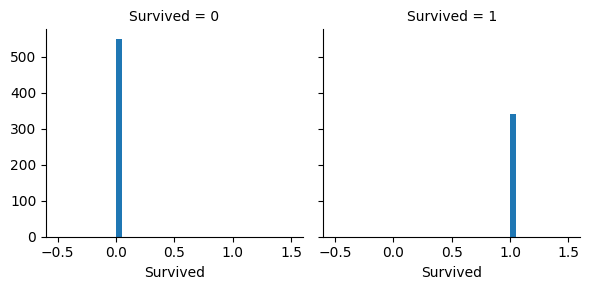

In [16]:
# has too mane values so use the histogram  
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Survived', bins=20)

In [17]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

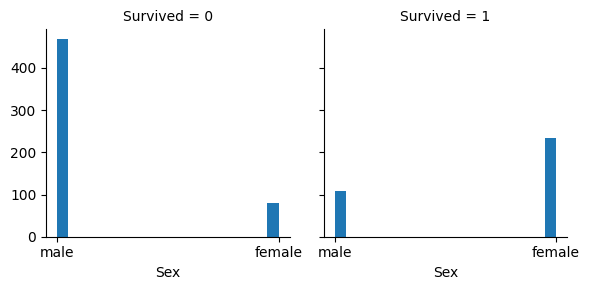

In [18]:
# (male and female) has too mane values so use the histogram    
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

In [19]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

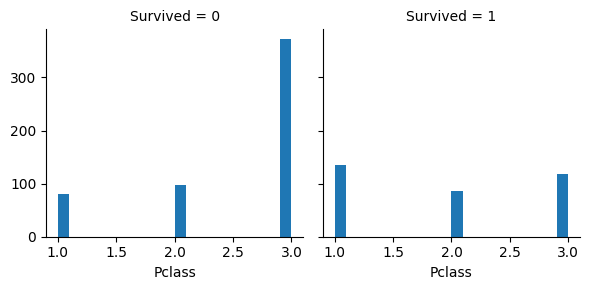

In [20]:
# cabine class (3 of them) has too mane values so use the histogram  
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

In [21]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

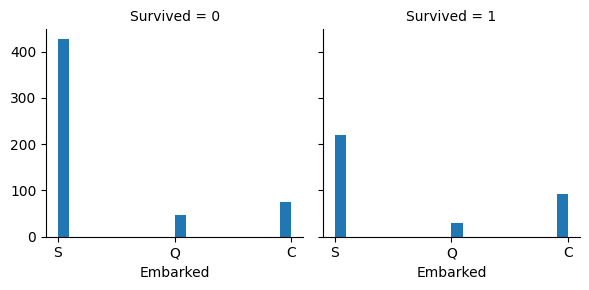

In [22]:
# (3 ports) has too mane values so use the histogram  
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Embarked', bins=20)

#### Encoding the Categorical Columns

In [23]:
df_train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#### Separating features & target

In [25]:
X = df_train.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
Y = df_train['Survived']

print(X, Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#### Splitting to train and test

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


#### Model training (RandomForestClassifier)

In [27]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

#### Model evaluation

In [28]:
X_train_prediction = model.predict(X_train)

print(X_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [36]:
X_train_prediction.shape

(712,)

In [29]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print('Accuracy score of training data: ', training_data_accuracy)

Accuracy score of training data:  0.9859550561797753


In [30]:
X_test_prediction = model.predict(X_test)

print(X_test_prediction)

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [35]:
X_test_prediction.shape

(179,)

In [31]:
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.8100558659217877


In [32]:
os.getcwd()

'C:\\Users\\Evolu\\Amazinum. Task 9. Titanik'

In [38]:
output= df_test.copy()
output['Survived'] = pd.Series(X_test_prediction)
output = output[['PassengerId', 'Survived']]
output.to_csv('Titanic_prediction.csv', index=False)

output.head(20)

,PassengerId,Survived
0,892,1.0
1,893,0.0
2,894,1.0
3,895,0.0
4,896,0.0
5,897,0.0
6,898,0.0
7,899,0.0
8,900,0.0
9,901,0.0
